In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
from pydataset import data
from datetime import datetime

# Problem 1

In [27]:
dow = pd.Series.from_csv('DJIA.csv')
dow = dow.replace(to_replace='.', value=np.nan)
dow = dow[1:].astype(np.float64)
dow.index = pd.to_datetime(dow.index)
#dow.head()



# Problem 2 

In [28]:
paychecks = pd.Series.from_csv('paychecks.csv', index_col = False)
#paychecks = paychecks.convert_objects(convert_numeric = True, convert_dates = True)
paychecks1 = pd.date_range(start = '3/13/2008', periods = 46, freq = 'WOM-1FRI')
paychecks2 = pd.date_range(start = '3/13/2008', periods = 47, freq = 'WOM-3FRI')
paychecks.index = paychecks1.union(paychecks2)
print paychecks
#paychecks.head()

2008-03-21    1122.26
2008-04-04     921.03
2008-04-18     962.46
2008-05-02    1035.97
2008-05-16    1078.59
2008-06-06    1110.97
2008-06-20    1121.91
2008-07-04     992.83
2008-07-18    1103.23
2008-08-01     944.66
2008-08-15    1030.07
2008-09-05     942.35
2008-09-19     909.83
2008-10-03    1125.79
2008-10-17     947.21
2008-11-07    1067.83
2008-11-21     991.64
2008-12-05     963.20
2008-12-19     912.61
2009-01-02    1018.91
2009-01-16     997.93
2009-02-06    1129.61
2009-02-20     963.64
2009-03-06    1009.76
2009-03-20     984.89
2009-04-03    1033.27
2009-04-17     934.76
2009-05-01    1122.10
2009-05-15    1032.46
2009-06-05     999.56
2009-06-19    1021.88
2009-07-03    1120.12
2009-07-17    1007.78
2009-08-07    1101.05
2009-08-21    1110.52
2009-09-04    1120.50
2009-09-18    1015.99
2009-10-02    1104.89
2009-10-16    1049.28
2009-11-06     923.36
2009-11-20    1051.23
2009-12-04     986.03
2009-12-18     986.25
2010-01-01     923.27
2010-01-15     906.94
2010-02-05

# Problem 3

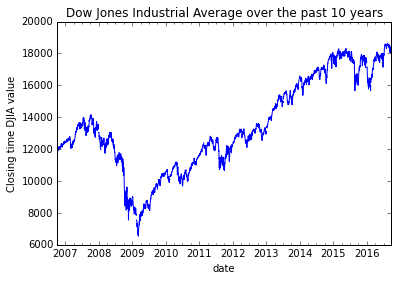

The data was provided in the lab


In [29]:
dow = dow[1:]
dow.plot()
plt.ylabel('Closing time DJIA value')
plt.xlabel('date')
plt.title('Dow Jones Industrial Average over the past 10 years')
plt.show()
print "The data was provided in the lab"

# Problem 4

In [30]:
finances = pd.read_csv('finances.csv')
finances.index = pd.period_range(start = '1978-09',end = '2016-10', freq = 'Q-SEP')[:84]
finances.head()

,EARNINGS,EXPENSES
1978Q4,372572.16,122611.27
1979Q1,419440.58,133176.18
1979Q2,419766.49,154670.69
1979Q3,361453.31,209360.42
1979Q4,354463.33,174147.13


# Problem 5

In [31]:
web_traffic = pd.read_csv('website_traffic.csv')
web_traffic['ENTER'] = pd.to_datetime(web_traffic['ENTER'])
web_traffic['LEAVE'] = pd.to_datetime(web_traffic['LEAVE'])
web_traffic['Duration'] = web_traffic['LEAVE']-web_traffic['ENTER']

In [32]:
print  'The average visit time is: {}'.format(web_traffic['Duration'].mean())

The average visit time is: 0 days 00:05:04.731647


In [33]:
web_traffic = pd.read_csv('website_traffic.csv')
web_traffic.index = pd.to_datetime(web_traffic['ENTER'])
web_traffic = web_traffic.resample('1H',how = 'count')['ENTER']
print web_traffic

ENTER
2016-10-07 01:00:00    618
2016-10-07 02:00:00    655
2016-10-07 03:00:00    670
2016-10-07 04:00:00    632
2016-10-07 05:00:00    672
2016-10-07 06:00:00    602
2016-10-07 07:00:00    660
2016-10-07 08:00:00    650
2016-10-07 09:00:00    665
2016-10-07 10:00:00    647
2016-10-07 11:00:00    605
2016-10-07 12:00:00    646
2016-10-07 13:00:00    670
2016-10-07 14:00:00    628
2016-10-07 15:00:00    607
2016-10-07 16:00:00    683
2016-10-07 17:00:00    632
2016-10-07 18:00:00    629
2016-10-07 19:00:00    702
2016-10-07 20:00:00    644
2016-10-07 21:00:00    641
2016-10-07 22:00:00    677
Freq: H, Name: ENTER, dtype: int64


# Problem 6

In [36]:
day_gain = dow-dow.shift(1)
month = dow.resample('MS', how='first', label = 'left')
month_gain = month-month.shift(1)
print 'day with the largest gain: {}'.format(str(day_gain.idxmax()))
print 'day with the largest loss: {}'.format(str(day_gain.idxmin()))
print 'Month with the largest gain: {}'.format(str(month_gain.idxmax()))
print 'Month with the largest loss: {}'.format(str(month_gain.idxmin()))

day with the largest gain: 2008-10-13 00:00:00
day with the largest loss: 2008-09-29 00:00:00
Month with the largest gain: 2015-11-01 00:00:00
Month with the largest loss: 2015-09-01 00:00:00


# Problem 7

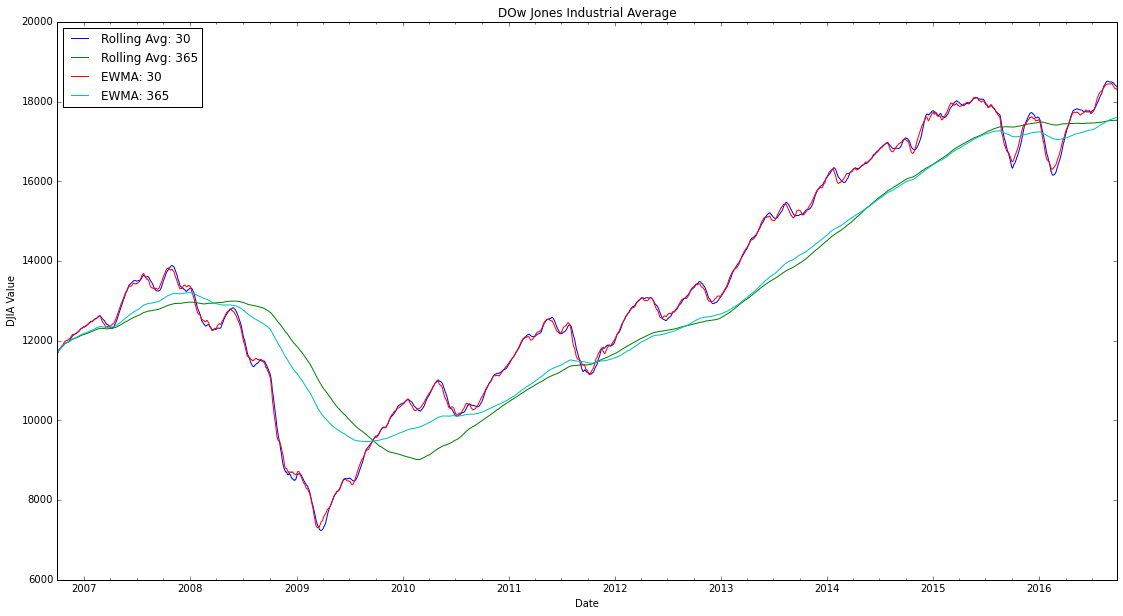

In [35]:
ax = plt.gca()
pd.rolling_mean(dow, window=30, min_periods = 1).plot(ax = ax, figsize = (19,10))
pd.rolling_mean(dow, window = 365, min_periods = 1).plot(ax =ax)
pd.ewma(dow, span = 30).plot(ax=ax)
pd.ewma(dow, span = 365).plot(ax=ax)
ax.legend(["Rolling Avg: 30", "Rolling Avg: 365", "EWMA: 30","EWMA: 365"], loc=2)
plt.title("DOw Jones Industrial Average")
plt.xlabel('Date')
plt.ylabel('DJIA Value')
plt.show()